In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/wine.csv")
X = df.drop("Wine", axis=1)
y = df["Wine"]

In [12]:
# 결측치 확인
df.isnull().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [16]:
accuracy_dict = {}
predictions = {}  # Lưu y_pred của từng model để vẽ CM
for name, model in models.items():
    if name in ["KNN", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    accuracy_dict[name] = accuracy_score(y_test, y_pred)
    predictions[name] = y_pred

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


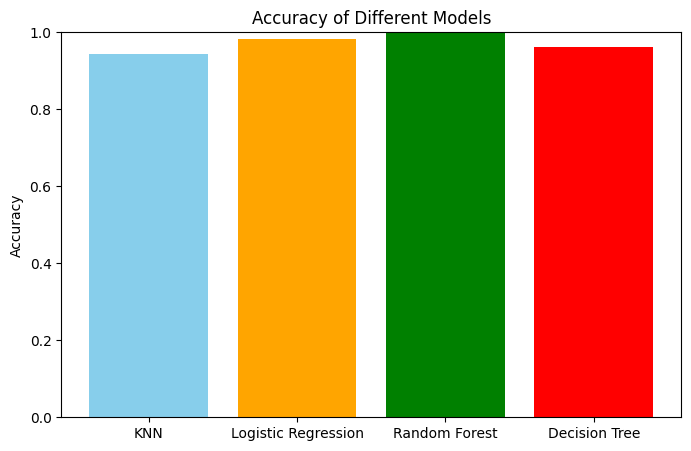

In [19]:
plt.figure(figsize=(8,5))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color=['skyblue','orange','green','red'])
plt.ylim(0,1)
plt.title("Accuracy of Different Models")
plt.ylabel("Accuracy")
plt.show()